In [172]:
#import libraries
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [173]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [174]:
first_target_news = "@BBC"
second_target_news = "@CBS"
third_target_news = "@CNN"
fourth_target_news ="@FoxNews"
fifth_target_news = "@nytimes"

counter = 0

BBC_Compound_List = []
BBC_Positive_List = []
BBC_Negative_List = []
BBC_Neutral_List = []
CBS_Compound_List = []
CBS_Positive_List = []
CBS_Negative_List = []
CBS_Neutral_List = []
CNN_Compound_List = []
CNN_Positive_List = []
CNN_Negative_List = []
CNN_Neutral_List = []
Fox_Compound_List = []
Fox_Positive_List = []
Fox_Negative_List = []
Fox_Neutral_List = []
NYT_Compound_List = []
NYT_Positive_List = []
NYT_Negative_List = []
NYT_Neutral_List = []
counter_list = []

#collect all 20 tweets on the first 5 pages worth of tweets for each news organization

for page in range(5):
    BBC_tweets = api.user_timeline(first_target_news, page=page)
    CBS_tweets = api.user_timeline(second_target_news, page=page)
    CNN_tweets = api.user_timeline(third_target_news, page=page)
    Fox_tweets = api.user_timeline(fourth_target_news, page=page)
    NYT_tweets = api.user_timeline(fifth_target_news, page=page)
    
    
    for tweet in BBC_tweets:
        BBCresults = analyzer.polarity_scores(tweet["text"])
        BBCcompound = BBCresults["compound"]
        BBCpos = BBCresults["pos"]
        BBCneu = BBCresults["neu"]
        BBCneg = BBCresults["neg"]
        
        BBC_Compound_List.append(BBCcompound)
        BBC_Positive_List.append(BBCpos)
        BBC_Negative_List.append(BBCneg)
        BBC_Neutral_List.append(BBCneu)
    

    for tweet in CBS_tweets:
        CBSresults = analyzer.polarity_scores(tweet["text"])
        CBScompound = CBSresults["compound"]
        CBSpos = CBSresults["pos"]
        CBSneu = CBSresults["neu"]
        CBSneg = CBSresults["neg"]
        
        CBS_Compound_List.append(CBScompound)
        CBS_Positive_List.append(CBSpos)
        CBS_Negative_List.append(CBSneg)
        CBS_Neutral_List.append(CBSneu)

    for tweet in CNN_tweets:
        CNNresults = analyzer.polarity_scores(tweet["text"])
        CNNcompound = CNNresults["compound"]
        CNNpos = CNNresults["pos"]
        CNNneu = CNNresults["neu"]
        CNNneg = CNNresults["neg"]
        
        CNN_Compound_List.append(CNNcompound)
        CNN_Positive_List.append(CNNpos)
        CNN_Negative_List.append(CNNneg)
        CNN_Neutral_List.append(CNNneu)

    for tweet in Fox_tweets:
        Foxresults = analyzer.polarity_scores(tweet["text"])
        Foxcompound = Foxresults["compound"]
        Foxpos = Foxresults["pos"]
        Foxneu = Foxresults["neu"]
        Foxneg = Foxresults["neg"]
        
        Fox_Compound_List.append(Foxcompound)
        Fox_Positive_List.append(Foxpos)
        Fox_Negative_List.append(Foxneg)
        Fox_Neutral_List.append(Foxneu)
    
        
    for tweet in NYT_tweets:
               
        NYTresults = analyzer.polarity_scores(tweet["text"])
        NYTcompound = NYTresults["compound"]
        NYTpos = NYTresults["pos"]
        NYTneu = NYTresults["neu"]
        NYTneg = NYTresults["neg"]
        
        NYT_Compound_List.append(NYTcompound)
        NYT_Positive_List.append(NYTpos)
        NYT_Negative_List.append(NYTneg)
        NYT_Neutral_List.append(NYTneu)
        
        
        counter = counter + 1
        counter_list.append(counter)

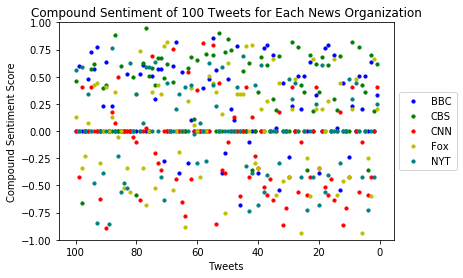

In [175]:
#bring lists into a dataframe
compound_scores = pd.DataFrame({"Date": tweet["created_at"], 
                           "BBC": BBC_Compound_List,
                           "CBS": CBS_Compound_List,
                           "CNN": CNN_Compound_List,
                           "Fox": Fox_Compound_List,
                           "NYT": NYT_Compound_List,
                           "tweets ago": counter_list
                           })


#sort by "tweets ago" descending:
sorted_df=compound_scores.sort_values(["tweets ago"], ascending=False)

#generate a CSV file:
sorted_df.to_csv("Sentiments.csv", index=False, header=True)


#create one scatterplot chart (with shared x axis):
view1 = sorted_df.reset_index().plot(kind="scatter", x='tweets ago', y='BBC',s=10, c='b', marker='o', label='BBC')
compound_scores.reset_index().plot(kind="scatter", x='tweets ago', y='CBS',s=10, c='g', ax=view1, marker='o', label='CBS')
compound_scores.reset_index().plot(kind="scatter", x='tweets ago', y='CNN',s=10, c='r', ax=view1, marker='o', label='CNN')
compound_scores.reset_index().plot(kind="scatter", x='tweets ago', y='Fox',s=10, c='y', ax=view1, marker='o', label='Fox')
compound_scores.reset_index().plot(kind="scatter", x='tweets ago', y='NYT',s=10, c='teal', ax=view1, marker='o', label='NYT')
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Tweets")
ax.set_ylabel("Compound Sentiment Score")
plt.title("Compound Sentiment of 100 Tweets for Each News Organization")
view1.set_ylim(-1,1)
plt.savefig("compound_sentiment_against_tweets.png")
plt.gca().invert_xaxis()
plt.show()

In [176]:
#get rid of original index, reset index to tweets ago, find the average compound scores across the df
compound_scores.reset_index(drop=True)
new_df = compound_scores.set_index('tweets ago')
mean_df = new_df.mean()

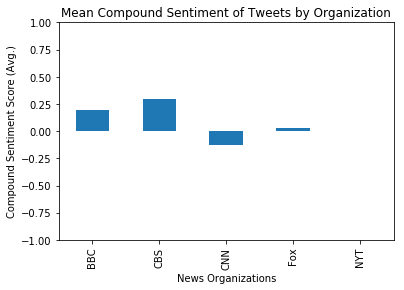

In [177]:
#plot a bar chart with average compound scores for each news organization
ax = plt.subplot(111)
ax.set_xlabel("News Organizations")
ax.set_ylabel("Compound Sentiment Score (Avg.)")
colors = ['b','g','r','y','teal']
mean_df.plot(kind="bar",title=("Mean Compound Sentiment of Tweets by Organization"))
ax.set_ylim(-1,1)
plt.savefig("mean_compoundsentiment_per_org.png")
plt.show()